<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/water_dew_point_claculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
%%capture
!pip install neqsim

# Water Dew Point in Natural Gas Using NeqSim
1. Introduction
In natural gas processing, the water dew point is a critical property. It tells us the temperature at which water will start to condense out of the gas mixture at a given pressure. This information helps determine the drying requirements of a gas stream to avoid issues with hydrate formation, corrosion, or liquid water accumulation in pipelines.

The NeqSim Python library provides thermodynamic and process modeling capabilities that allow engineers and scientists to model these kinds of systems.

# SRK-EoS

In [43]:
# Import required libraries
from neqsim.thermo import fluid
from neqsim import jneqsim as neqsim

# Define thermodynamic system (using SRK-EOS)
fluid1 = fluid('srk')
fluid1.setTemperature(270.15)  # initial guess temperature (K)
fluid1.setPressure(70.0)     # pressure in bar

# Define gas composition
ppmWater = 35.0
components = {
    'CO2': 0.02,
    'nitrogen': 0.01,
    'methane': 0.9 - ppmWater * 1e-6,
    'ethane': 0.05,
    'propane': 0.01,
    'i-butane': 0.005,
    'n-butane': 0.005,
    'water': ppmWater * 1e-6
}

for comp, frac in components.items():
    fluid1.addComponent(comp, frac)

# Set the mixing rule
fluid1.setMixingRule(2)

# Perform water dew point calculation
ops = neqsim.thermodynamicoperations.ThermodynamicOperations(fluid1)
ops.waterDewPointTemperatureFlash()

# Display calculated dew point temperature
dew_point_temperature = fluid1.getTemperature("C")
print(f"Water Dew Point Temperature at {fluid1.getPressure()} bar: {dew_point_temperature:.2f} °C")


Water Dew Point Temperature at 70.0 bar: -12.10 °C


# CPA-EoS

In [44]:
# Import required libraries
from neqsim.thermo import fluid
from neqsim import jneqsim as neqsim

# Define thermodynamic system (using SRK-EOS)
fluid1 = fluid('cpa')
fluid1.setTemperature(270.15)  # initial guess temperature (K)
fluid1.setPressure(70.0)     # pressure in bar

# Define gas composition
ppmWater = 35.0
components = {
    'CO2': 0.02,
    'nitrogen': 0.01,
    'methane': 0.9 - ppmWater * 1e-6,
    'ethane': 0.05,
    'propane': 0.01,
    'i-butane': 0.005,
    'n-butane': 0.005,
    'water': ppmWater * 1e-6
}

for comp, frac in components.items():
    fluid1.addComponent(comp, frac)

# Set the mixing rule
fluid1.setMixingRule(10)

# Perform water dew point calculation
ops = neqsim.thermodynamicoperations.ThermodynamicOperations(fluid1)
ops.waterDewPointTemperatureMultiphaseFlash()

# Display calculated dew point temperature
dew_point_temperature = fluid1.getTemperature("C")
print(f"Water Dew Point Temperature at {fluid1.getPressure()} bar: {dew_point_temperature:.2f} °C")


Water Dew Point Temperature at 70.0 bar: -18.63 °C


# Water in condensed phase in a gas saturated with water and lean TEG

In [45]:
# Import required libraries
from neqsim.thermo import fluid, printFrame
from neqsim import jneqsim as neqsim

# Define thermodynamic system (using SRK-EOS)
fluid1 = fluid('cpa')
fluid1.setTemperature(273.15+30)  # initial guess temperature (K)
fluid1.setPressure(70.0)     # pressure in bar

# Define gas composition
ppmWater = 38.0
ppmTEG = 1.0
components = {
    'CO2': 0.02,
    'nitrogen': 0.01,
    'methane': 0.9 - ppmWater * 1e-6,
    'ethane': 0.05,
    'propane': 0.01,
    'i-butane': 0.005,
    'n-butane': 0.005,
    'water': ppmWater * 1e-6,
    'TEG': ppmWater * 1e-6
}

for comp, frac in components.items():
    fluid1.addComponent(comp, frac)

# Set the mixing rule
fluid1.setMixingRule(10)
fluid1.setMultiPhaseCheck(True)

# Perform water dew point calculation
ops = neqsim.thermodynamicoperations.ThermodynamicOperations(fluid1)
ops.TPflash()

printFrame(fluid1)

wtFracTEG =  fluid1.getPhase('aqueous').getWtFrac('TEG')
wtFracWater =  fluid1.getPhase('aqueous').getWtFrac('water')
print('wt % TEG ' , wtFracTEG*100)
print('wt % water ' , wtFracWater*100)

print('ppm water in gas ', fluid1.getPhase('gas').getComponent('water').getx()*1e6)

| 0                    | 1          | 2                    | 3                    | 4   | 5   | 6               |
|:---------------------|:-----------|:---------------------|:---------------------|:----|:----|:----------------|
|                      | total      | GAS                  | AQUEOUS              |     |     |                 |
| CO2                  | 1.99992E-2 | 1.99998E-2           | 7.9281E-3            |     |     | [mole fraction] |
| nitrogen             | 9.99962E-3 | 1E-2                 | 1.61988E-4           |     |     | [mole fraction] |
| methane              | 8.99928E-1 | 8.99965E-1           | 2.36438E-2           |     |     | [mole fraction] |
| ethane               | 4.99981E-2 | 5E-2                 | 4.83823E-3           |     |     | [mole fraction] |
| propane              | 9.99962E-3 | 9.99998E-3           | 1.57798E-3           |     |     | [mole fraction] |
| i-butane             | 4.99981E-3 | 4.99983E-3           | 4.43891E-3           |     

Calculation of water content in liquid film as function of temperature at 70C. Freezing point of TEG and hydrate should also be checked.

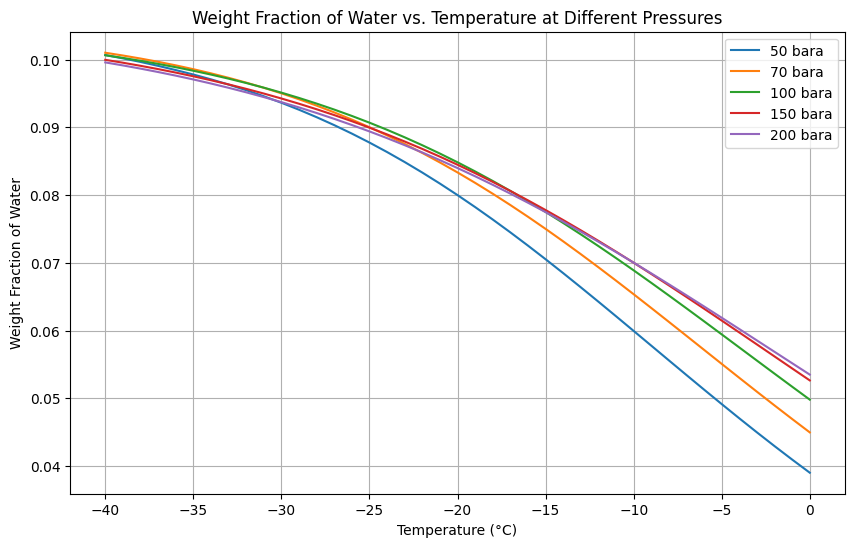

In [46]:
import numpy as np
import matplotlib.pyplot as plt
# Temperature range
temperatures = np.arange(0, -41, -1)  # From 0 to -30 in steps of -1

# Pressures to plot
pressures = [50, 70, 100, 150, 200]

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

for pressure in pressures:
    wt_fractions = []
    fluid1.setPressure(pressure, 'bara')  # Set pressure for current iteration
    for temp in temperatures:
        fluid1.setTemperature(temp, 'C')
        ops = neqsim.thermodynamicoperations.ThermodynamicOperations(fluid1)
        ops.TPflash()
        wtFracWater = fluid1.getPhase('aqueous').getWtFrac('water')
        wt_fractions.append(wtFracWater)

    plt.plot(temperatures, wt_fractions, label=f'{pressure} bara')

plt.xlabel('Temperature (°C)')
plt.ylabel('Weight Fraction of Water')
plt.title('Weight Fraction of Water vs. Temperature at Different Pressures')
plt.grid(True)
plt.legend()
plt.show()

Corrosion of carbn steel will typically be significant when wt% water is higher than 10%. In princible, so this is accpetable at temperatures >-40C.

Hydrate check

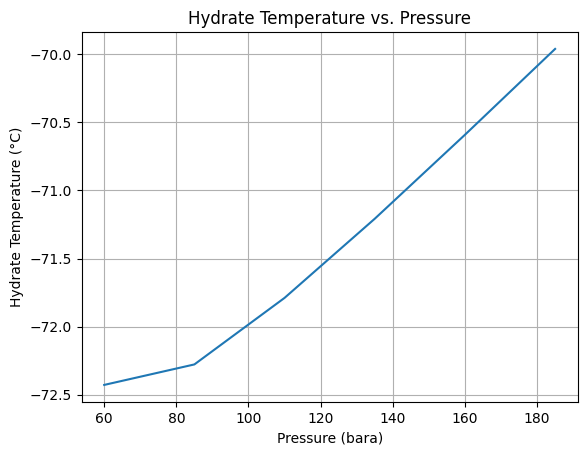

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from neqsim.thermo import fluid, hydt, freeze
from neqsim import jneqsim as neqsim

# Pressure range
pressures = np.arange(60, 201, 25)  # From 10 to 200 in steps of 1 bar
hydrate_temperatures = []
freeze_TEG_temperatures = []
#fluid1.solidCheck('TEG')

# Calculate hydrate temperature for each pressure
for pressure in pressures:
    fluid1.setPressure(pressure, 'bara')
    hydrate_temp = hydt(fluid1)-273.15
    hydrate_temperatures.append(hydrate_temp)
    #hydrate_temp = freeze(fluid1)-273.15
    #freeze_TEG_temperatures.append(hydrate_temp)

# Create the plot
plt.plot(pressures, hydrate_temperatures)
plt.xlabel('Pressure (bara)')
plt.ylabel('Hydrate Temperature (°C)')
plt.title('Hydrate Temperature vs. Pressure')
plt.grid(True)
plt.show()

# Calculation of saturated water in gas at given pressure and temperature

In [50]:
# Import required libraries
from neqsim.thermo import fluid
from neqsim import jneqsim as neqsim

temperature = -18.0  # temperature in °C
pressure = 70.0  # pressure in bara
# Define thermodynamic system (using SRK-EOS)
fluid1 = fluid('cpa')
fluid1.setTemperature(temperature, 'C')  # initial guess temperature (K)
fluid1.setPressure(pressure, 'bara')     # pressure in bar

# Define gas composition
ppmWater = 35.0
components = {
    'CO2': 0.02,
    'nitrogen': 0.01,
    'methane': 0.9 - ppmWater * 1e-6,
    'ethane': 0.05,
    'propane': 0.01,
    'i-butane': 0.005,
    'n-butane': 0.005,
    'water': ppmWater * 1e-6
}

for comp, frac in components.items():
    fluid1.addComponent(comp, frac)

# Set the mixing rule
fluid1.setMixingRule(10)

# Perform water dew point calculation
ops = neqsim.thermodynamicoperations.ThermodynamicOperations(fluid1)
ops.saturateWithWater()

# Display calculated dew point temperature
ppm_water_in_gas = fluid1.getPhase("gas").getComponent("water").getx() * 1e6
print(f"Water in gas at {fluid1.getPressure('bara')} bara and {fluid1.getTemperature('C')} °C: {ppm_water_in_gas:.2f} ppm")

Water in gas at 70.0 bara and -18.0 °C: 36.70 ppm
